In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

### 타이타닉 데이터를 활용한 탑승자의 생사여부 예측

In [38]:
train_df <- read.csv("./Data/Titanic_train.csv")
head(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [39]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [40]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


# 컬럼 내용 확인
- survived : 생존여부 ,0=dead,1=alive
- pclass : 티켓등급
- sibSp : 함께 탑승한 형제, 자매, 배우자의 수
- parch : 함께 탑승한 부모 자식의 수
- fare : 운임
- cabin : 객실번호
- Embarked : 탑승 항구, S=사우스햄튼(영국), C=잘츠부르크(오스트리아),Q=퀸스타운(영국)

In [41]:
colSums(is.na(train_df)) #결측치 확인

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [42]:
177/891

[1] 0.1986532

In [43]:
subset(train_df,!is.na(train_df$Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


In [75]:
# Survived 기준으로 dataset정렬
library(dplyr)
head(arrange(train_df,desc(train_df$Survived)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
5,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
6,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


In [45]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [46]:
#survived의 생존과 사망의 비율 검토
nrow(subset(train_df,train_df$Survived==0))
nrow(subset(train_df,train_df$Survived==1))
nrow(subset(train_df,train_df$Survived==0)) /nrow(train_df) *100 # 사망자
nrow(subset(train_df,train_df$Survived==1)) /nrow(train_df) *100 # 생존자

table(train_df$Survived)

[1] 549

[1] 342

[1] 61.61616

[1] 38.38384


  0   1 
549 342 

In [47]:
a <- nrow(train_df[train_df$Survived==0,])/nrow(train_df)*100
b <- nrow(train_df[train_df$Survived==1,])/nrow(train_df) *100
c <- nrow(train_df[train_df$Survived==0,])
d <- nrow(train_df[train_df$Survived==1,])
df <- data.frame(Category = c("사망", "생존"),
                 Count = c(c, d))
df

Category,Count
<chr>,<int>
사망,549
생존,342


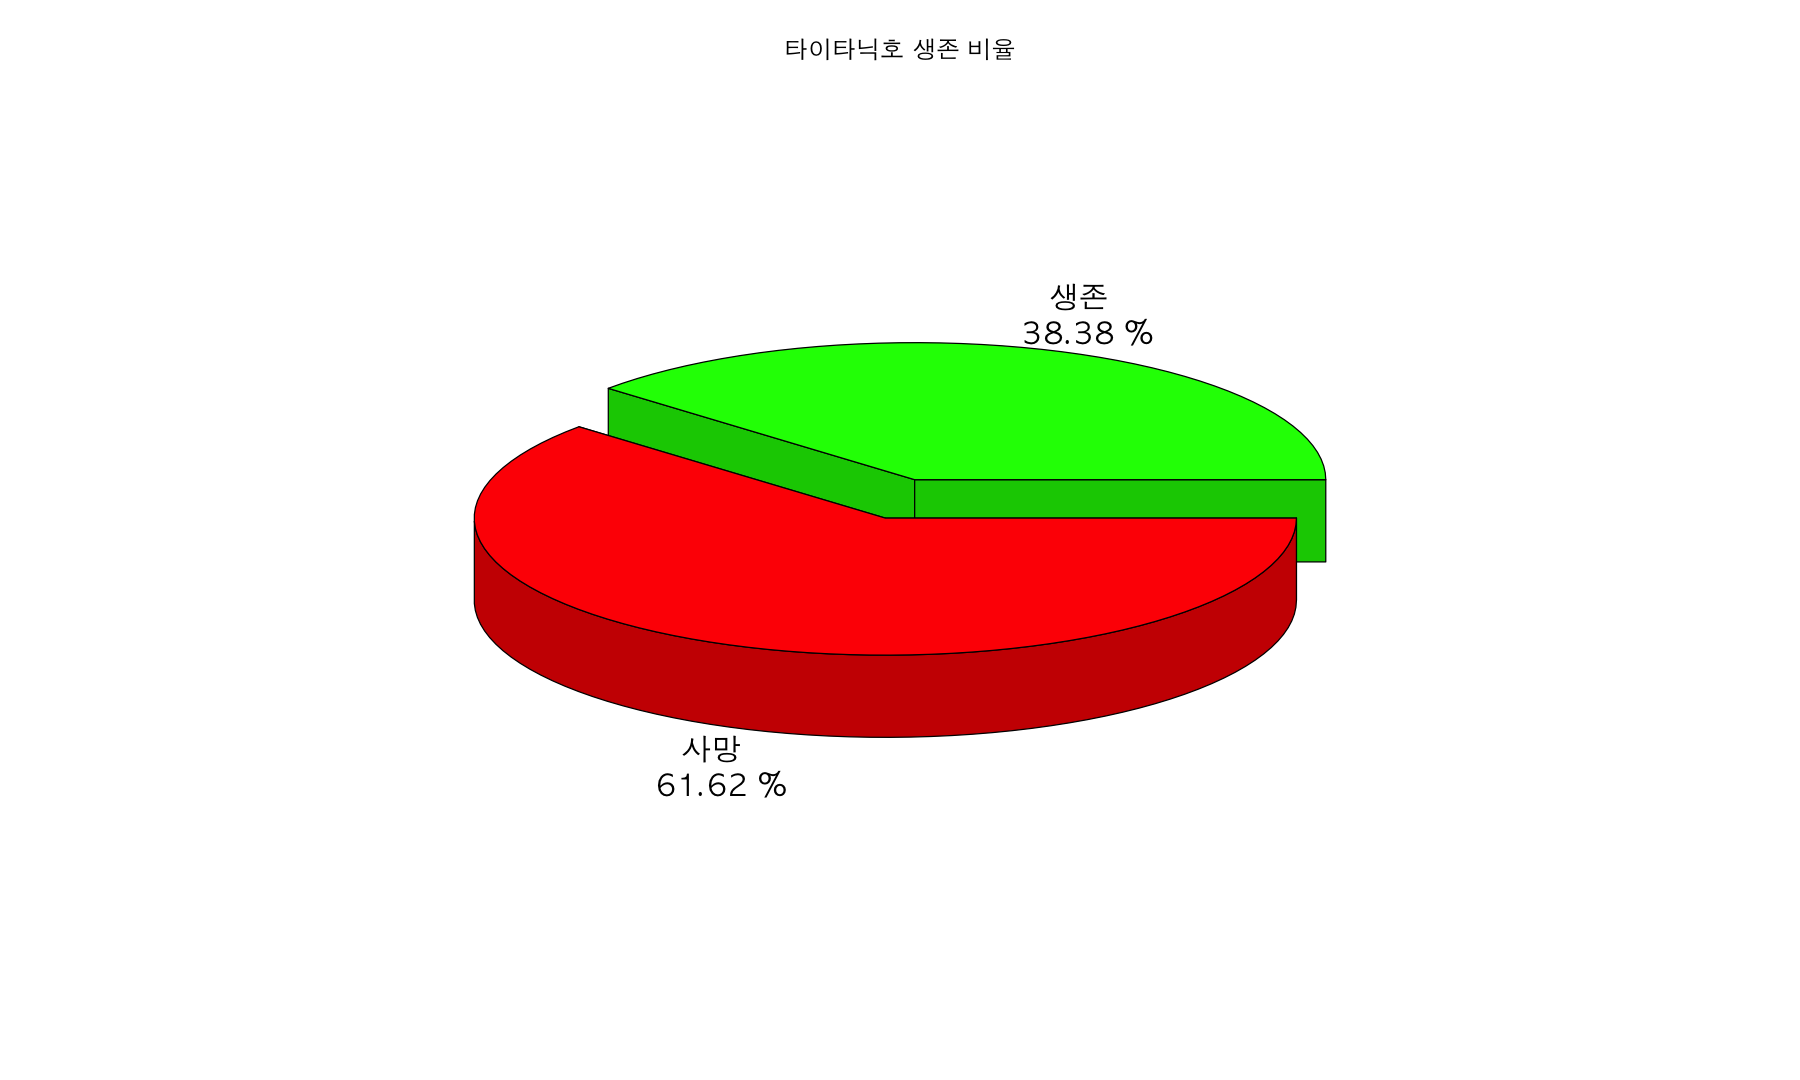

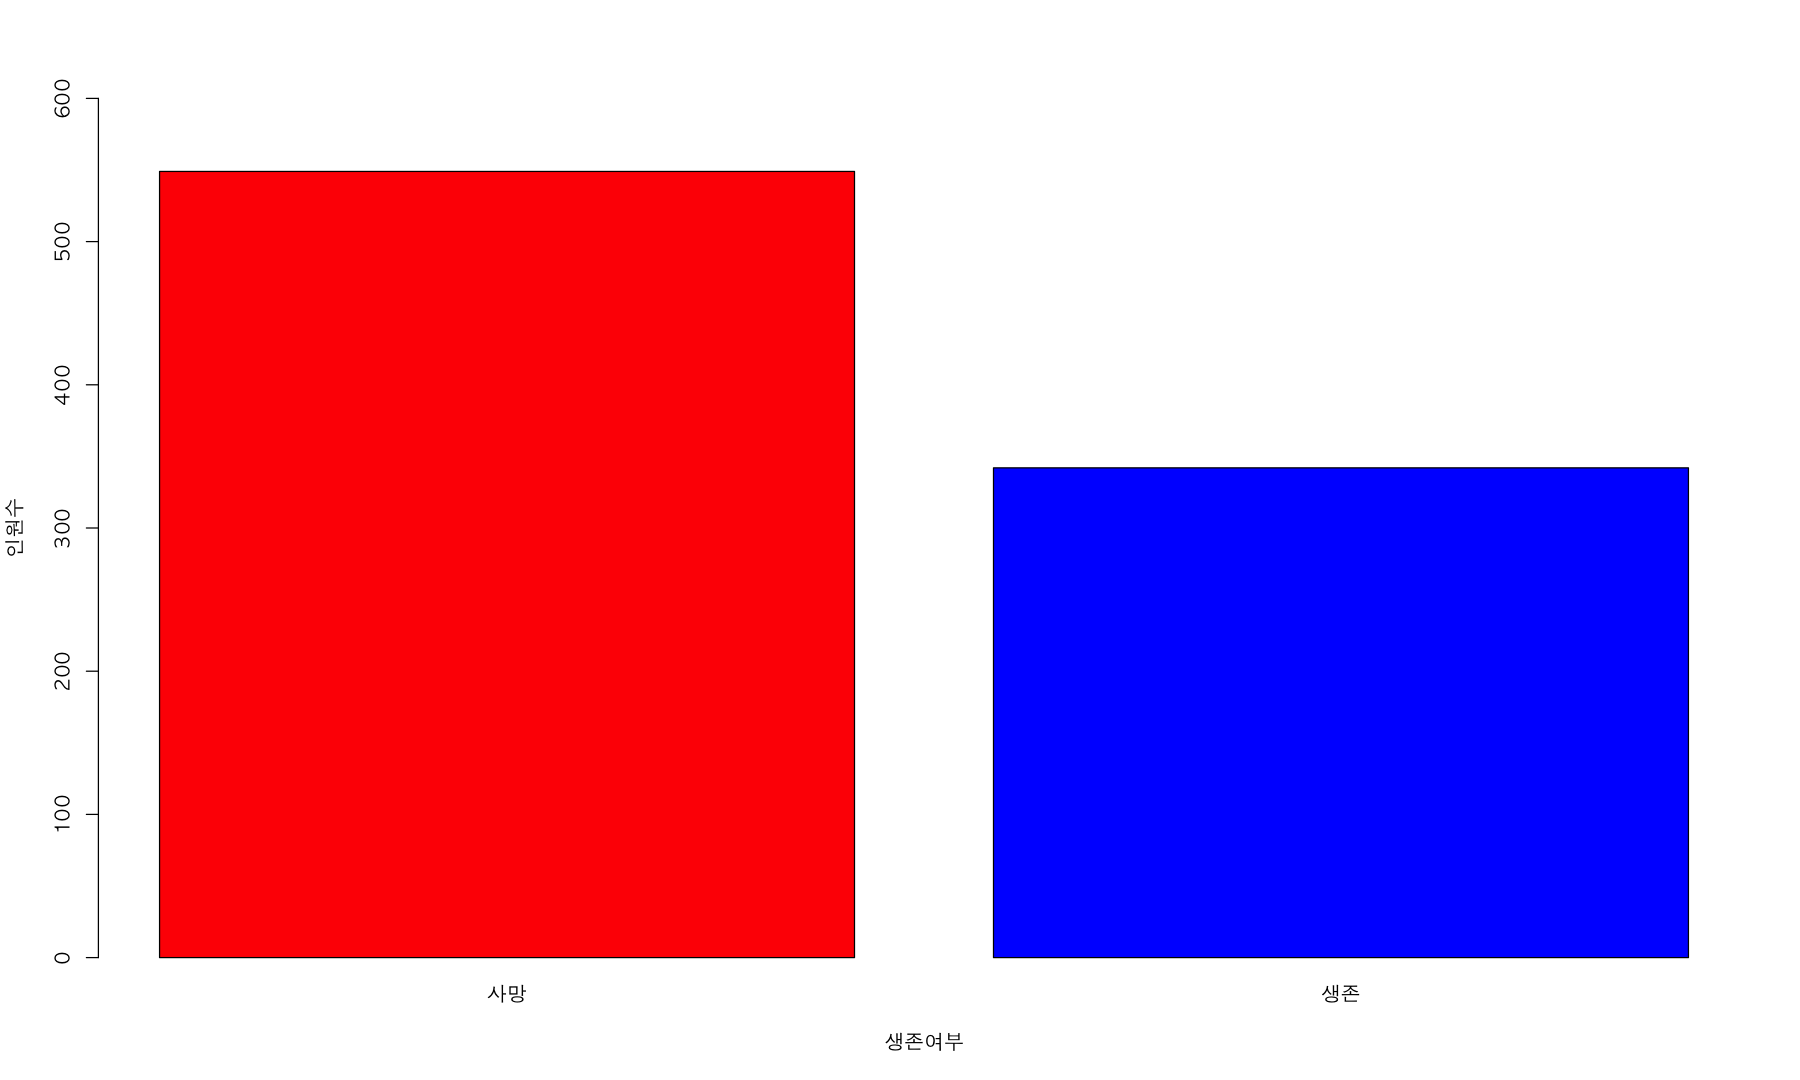

In [48]:
library(plotrix)
par(bg='white',family = "AppleGothic")
pie3D(c(b,a),
      labels = c(paste("생존","\n",round(b,2),'%'),
                 paste("사망","\n", round(a, 2), "%")),
      explode = 0.1,
      main = "타이타닉호 생존 비율",
      col = c("green", "red"))

barplot(df$Count,ylim=c(0,600),ylab="인원수",xlab="생존여부",col=c('red','blue'),names=df$Category)      


In [49]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] "male"   "female"

In [50]:
#여성의 인원과 남성의 인원 확인
nrow(train_df[train_df$Sex=="male",])
nrow(train_df[train_df$Sex=="female",])

a <- nrow(train_df[train_df$Sex=="male"&train_df$Survived==0,])/nrow(train_df[train_df$Sex=="male",])*100
b <- nrow(train_df[train_df$Sex=="male"&train_df$Survived==1,])/nrow(train_df[train_df$Sex=="male",])*100
df <- data.frame(Category = c("사망", "생존"),
                 Count = c(a,b))
                 df


nrow(train_df[train_df$Sex=="female"&train_df$Survived==0,])/nrow(train_df[train_df$Sex=="female",])*100
nrow(train_df[train_df$Sex=="female"&train_df$Survived==1,])/nrow(train_df[train_df$Sex=="female",])*100

[1] 577

[1] 314

Category,Count
<chr>,<dbl>
사망,81.10919
생존,18.89081


[1] 25.79618

[1] 74.20382

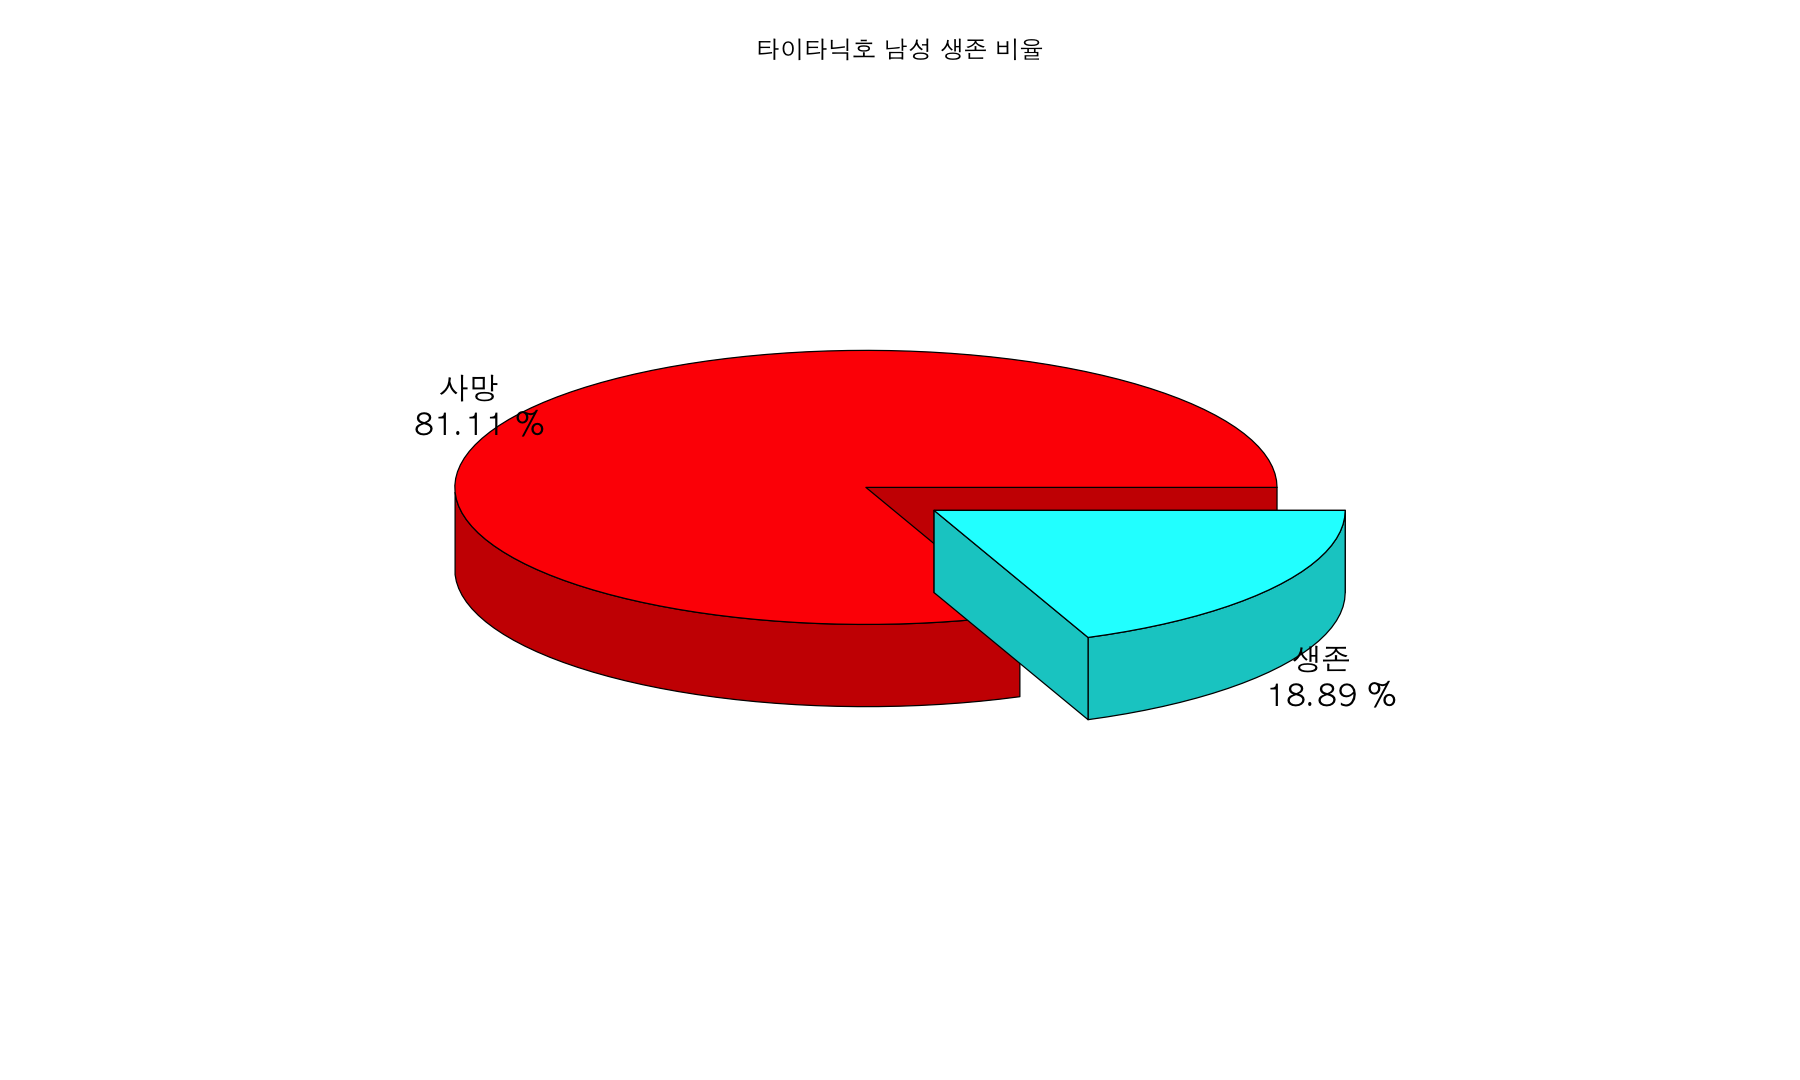

In [51]:
library(plotrix)
par(bg='white',family = "AppleGothic")
pie3D(c(a,b),
      labels = c(paste("사망","\n",round(a,2),'%'),
                 paste("생존","\n", round(b, 2), "%")),
      explode = 0.1,
      main = "타이타닉호 남성 생존 비율",
      col = c('red','cyan'))

      

[1] 577

[1] 314

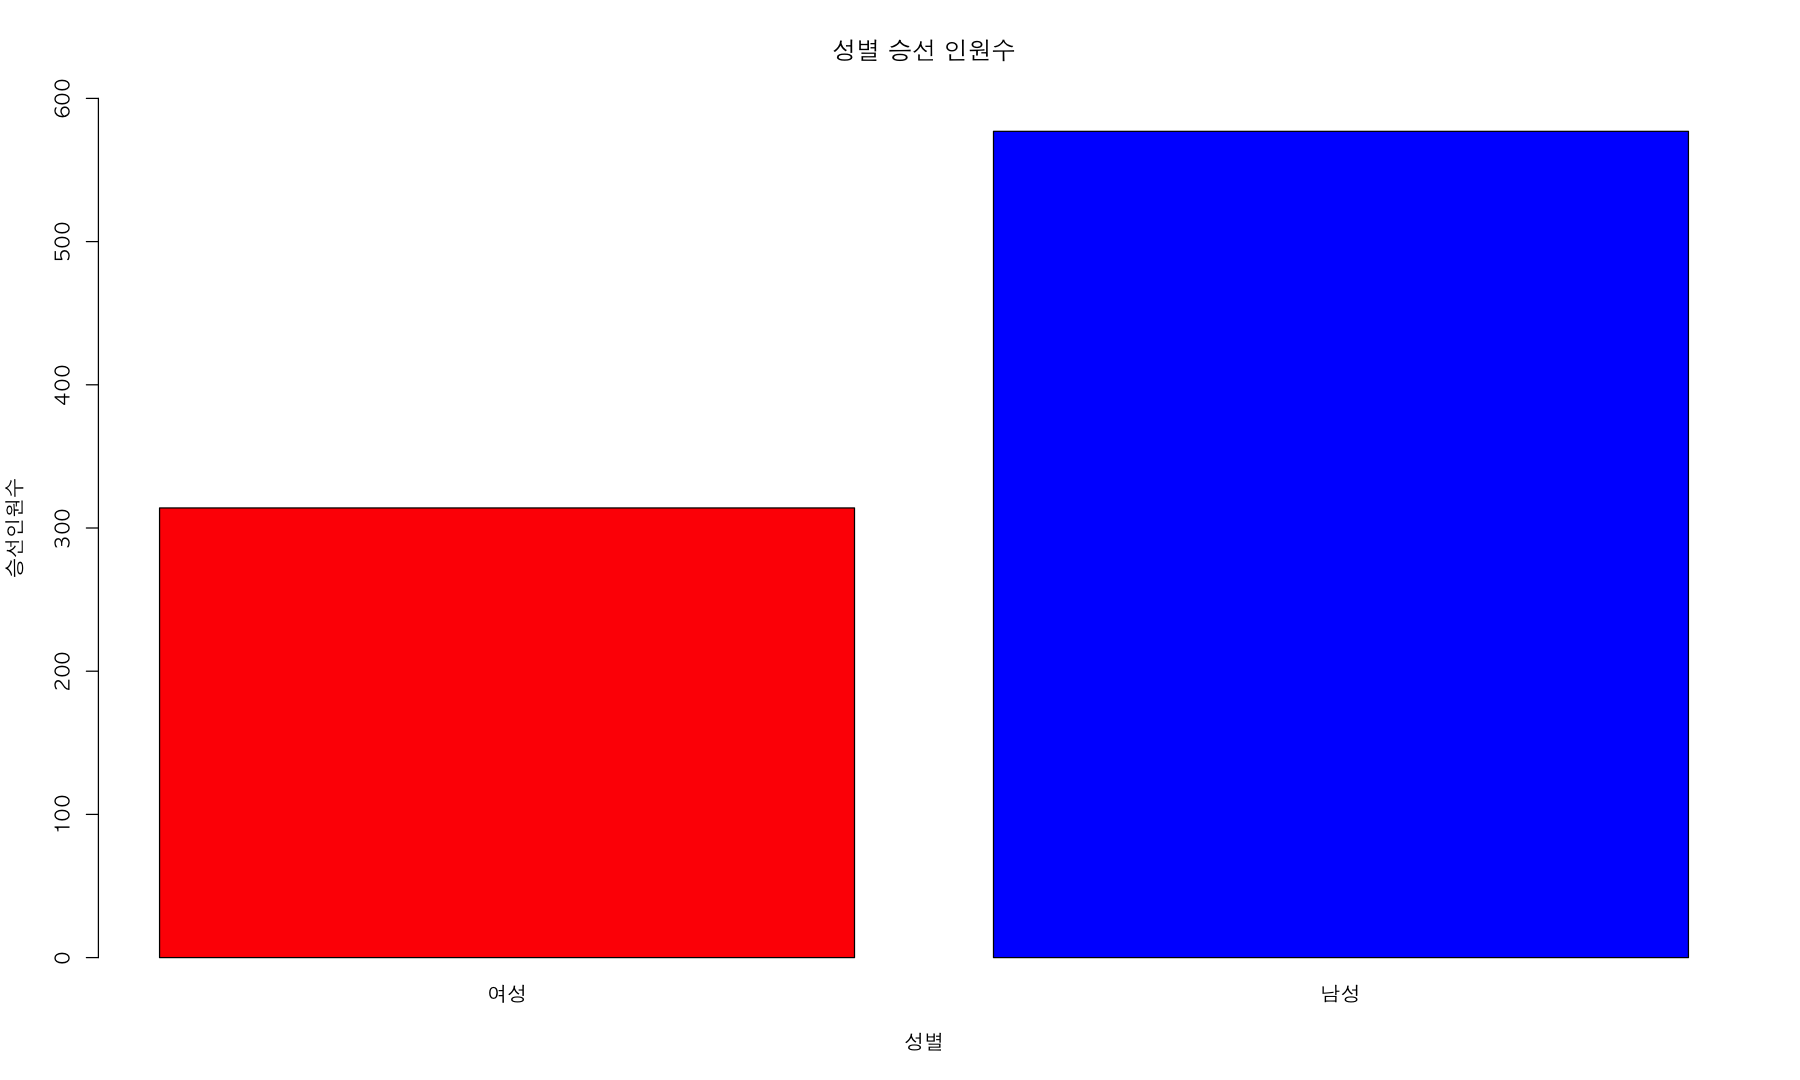

In [52]:
nrow(train_df[train_df$Sex=="male",])
nrow(train_df[train_df$Sex=="female",])

df <- data.frame(Category = c("여성", "남성"),
                 Count = c(nrow(train_df[train_df$Sex=="female",]),nrow(train_df[train_df$Sex=="male",])))

par(bg='white',family = "AppleGothic")
barplot(df$Count,ylim=c(0,600),ylab="승선인원수",xlab="성별",col=c('red','blue'),names=df$Category,main="성별 승선 인원수")      


In [53]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [54]:
#1등 객실의 여성생존율
a <- nrow(train_df[train_df$Sex=="female"&train_df$Survived==1&train_df$Pclass==1,])
b<- nrow(train_df[train_df$Pclass==1&train_df$Sex=="female",])
c<- nrow(train_df[train_df$Sex=="female"&train_df$Survived==1&train_df$Pclass==1,])/nrow(train_df[train_df$Pclass==1&train_df$Sex=="female",])*100

cat("1등 객실의 여성 생존율은 ",a,"/",b,",",round(c,2),"%")

1등 객실의 여성 생존율은  91 / 94 , 96.81 %

In [55]:

d <- nrow(table(train_df$Pclass))
female_survival_rates <- numeric()
male_survival_rates <- numeric()
for (i in 1:2) {
  if (i == 1) {
    gender <- "여성"
  } else {
    gender <- "남성"
  }
  
  
  for (j in 1:d) {
    a <- nrow(train_df[train_df$Sex == ifelse(i == 1, "female", "male") & train_df$Survived == 1 & train_df$Pclass == j,])
    b <- nrow(train_df[train_df$Pclass == j & train_df$Sex == ifelse(i == 1, "female", "male"),])
    c <- a / b * 100
    if (i == 1) {
      female_survival_rates <- append(female_survival_rates, round(c, 2))
    } else {
      male_survival_rates <- append(male_survival_rates, round(c, 2))
    }
    
    cat(j, "등 객실의", gender, "생존율은", a, "/", b, ",", round(c, 2), "%\n")
  }
  
  cat("---------------------\n")
}
female_survival_rates[1]
  df_femail1 <- data.frame(Category = character(), Count = numeric())
for (i in 1:d) {
  df_femail <- data.frame(Category = paste(i, "객실 (여)"),
                          Count = female_survival_rates[i])


  df_femail1 <- rbind(df_femail1, df_femail)
  
}
df_femail1
df_mail1 <- data.frame(Category = character(), Count = numeric())
for (i in 1:d) {
  df_mail <- data.frame(Category = paste(i, "객실 (남)"),
                          Count = male_survival_rates[i])


  df_mail1 <- rbind(df_mail1, df_mail)
  
}
df_mail1

aa <- rbind(df_femail1,df_mail1)
aa

1 등 객실의 여성 생존율은 91 / 94 , 96.81 %
2 등 객실의 여성 생존율은 70 / 76 , 92.11 %
3 등 객실의 여성 생존율은 72 / 144 , 50 %
---------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 %
2 등 객실의 남성 생존율은 17 / 108 , 15.74 %
3 등 객실의 남성 생존율은 47 / 347 , 13.54 %
---------------------


[1] 96.81

Category,Count
<chr>,<dbl>
1 객실 (여),96.81
2 객실 (여),92.11
3 객실 (여),50.00


Category,Count
<chr>,<dbl>
1 객실 (남),36.89
2 객실 (남),15.74
3 객실 (남),13.54


Category,Count
<chr>,<dbl>
1 객실 (여),96.81
2 객실 (여),92.11
3 객실 (여),50.00
1 객실 (남),36.89
2 객실 (남),15.74
3 객실 (남),13.54


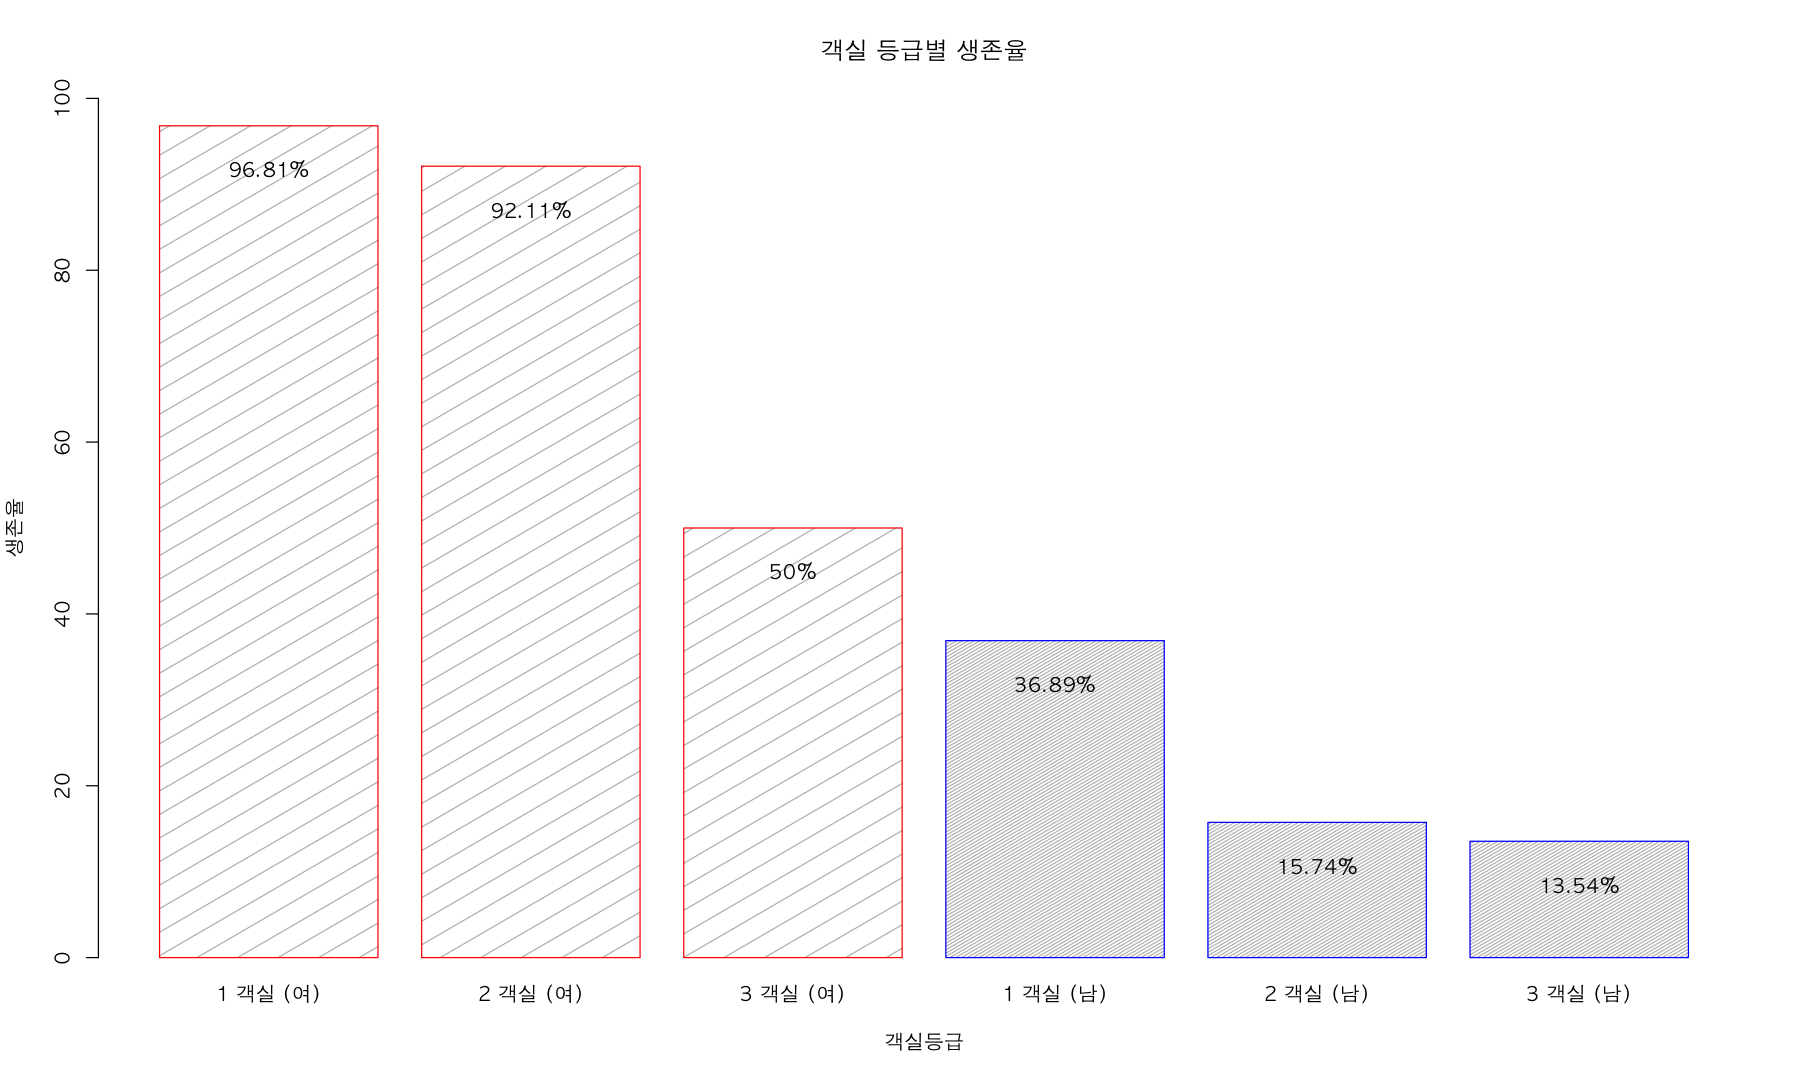

In [24]:

par(bg='white',family = "AppleGothic")
barplot(aa$Count,ylim=c(0,100),names=aa$Category,ylab="생존율",xlab="객실등급",main="객실 등급별 생존율",density =c(10,10,10,70,70,70),
border = c(rep('red',3),rep('blue',3)))
for (i in 1:length(aa$Category)) {
  text(0.7 + 1.2 * (i - 1),aa$Count[i]-5, paste0(aa$Count[i] ,"%"))
}

In [56]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [57]:
subset(train_df,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [60]:
# 복사본 만들기
train_df_T <-train_df
subset(train_df_T,Embarked=="")

# 항구별 탑승인원수 구해 가장많은 탑승인원의 항구로 결정
nrow(train_df[train_df$Embarked=="S",])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


[1] 644

In [61]:
train_df_T$Embarked <- ifelse(train_df$Embarked=="",'S',train_df_T$Embarked) ##전체재분배
subset(train_df_T,Embarked=="")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>


In [62]:
train_df_T <-train_df

In [63]:
train_df_T[train_df_T$Embarked=="",]$Embarked <-'S' ##빈것들만 재분배

In [64]:

table(train_df$Sex,train_df$Embarked)

a <- table(train_df$Survived,train_df$Embarked)

rownames(a) <- c("death","survive")
a

table(train_df$Pclass,train_df$Embarked)

        
               C   Q   S
  female   2  73  36 203
  male     0  95  41 441

         
                C   Q   S
  death     0  75  47 427
  survive   2  93  30 217

   
          C   Q   S
  1   2  85   2 127
  2   0  17   3 164
  3   0  66  72 353

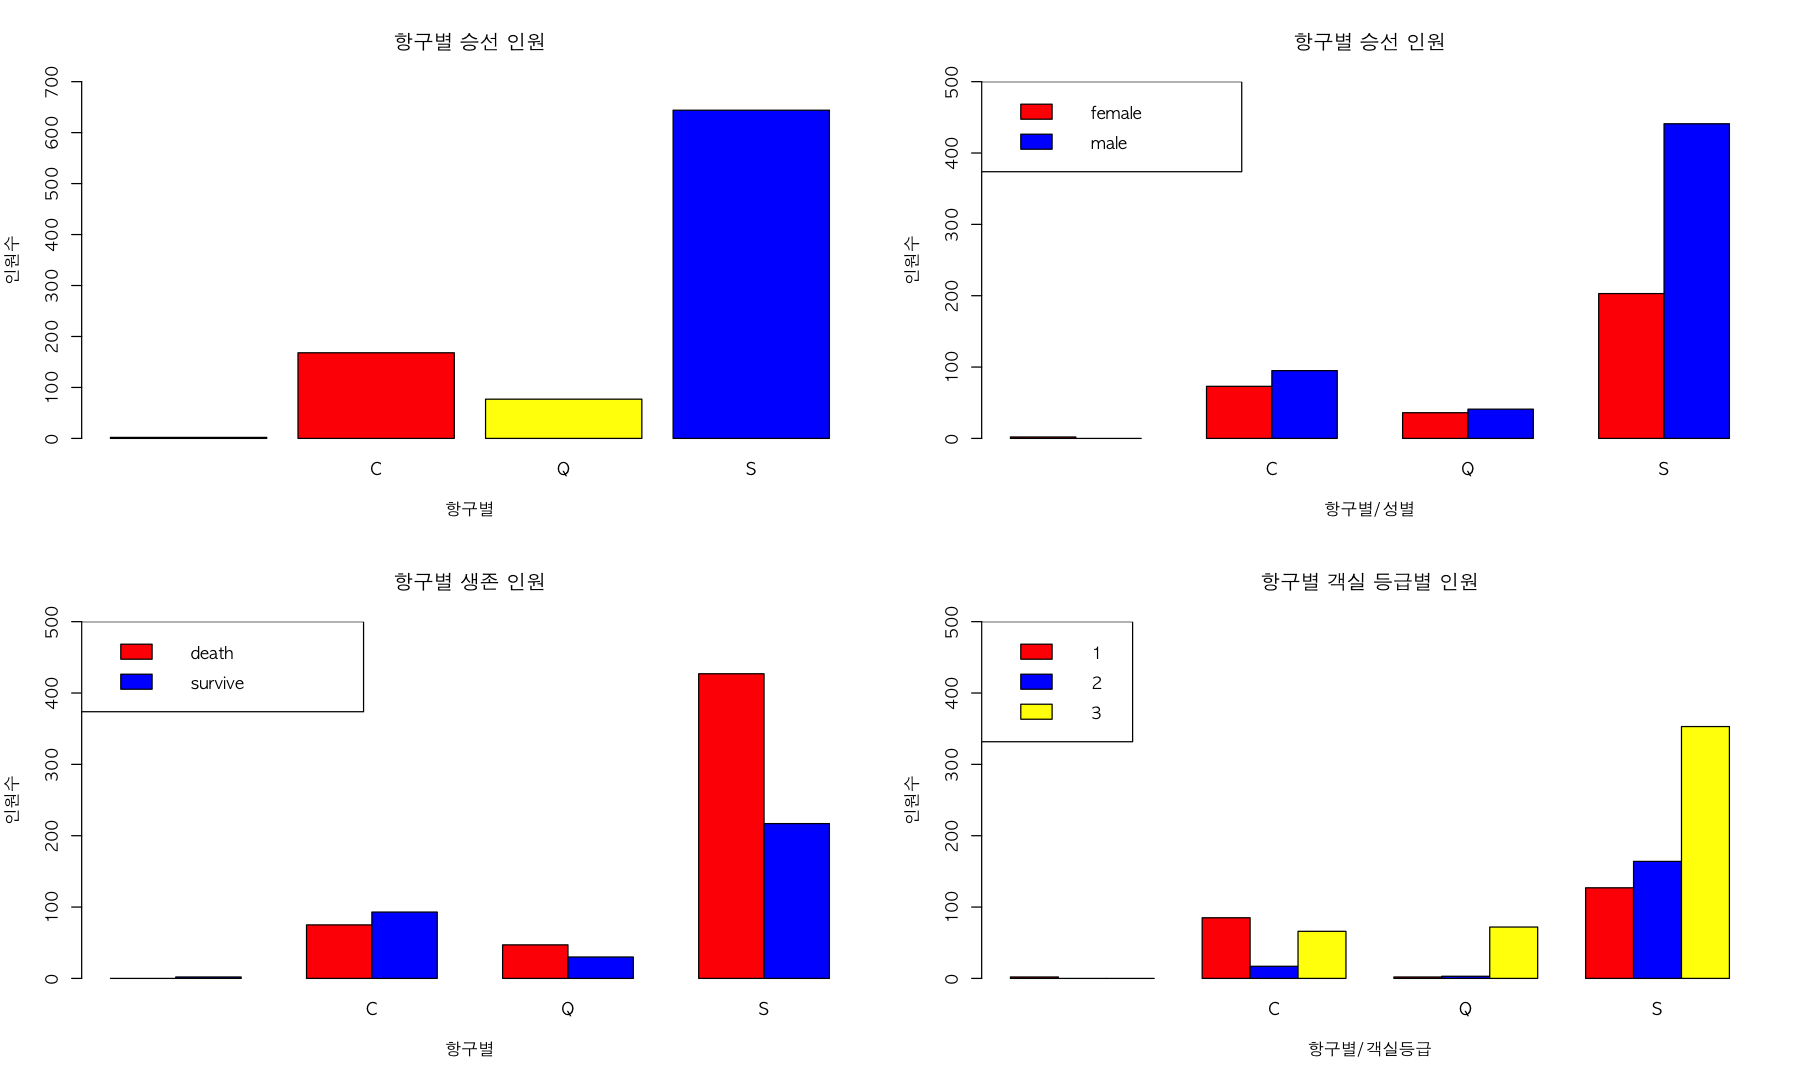

In [65]:
par(bg='white',family = "AppleGothic")
par(mfrow=c(2,2))
barplot(table(train_df$Embarked),ylim=c(0,700),ylab="인원수",xlab="항구별",main="항구별 승선 인원",
    col=c('blue','red','yellow')
)
barplot(table(train_df$Sex ,train_df$Embarked),ylim=c(0,500),ylab="인원수",xlab="항구별/성별",main="항구별 승선 인원",
    col = rep(c('red', 'blue'),3),beside=T
)
legend(x = "topleft", legend = rownames(table(train_df$Sex,train_df$Embarked)), fill = c("red", "blue"))

barplot(a,ylim=c(0,500),ylab="인원수",xlab="항구별",main="항구별 생존 인원",
    col = rep(c('red', 'blue'),3),beside=T
)
legend(x = "topleft", legend = rownames(a), fill = c("red", "blue"))

barplot(table(train_df$Pclass,train_df$Embarked),ylim=c(0,500),ylab="인원수",xlab="항구별/객실등급",main="항구별 객실 등급별 인원",
    col = rep(c('red', 'blue','yellow'),3),beside=T
)
legend(x = "topleft", legend = rownames(table(train_df$Pclass,train_df$Embarked)), fill = c("red", "blue",'yellow'))

절반 이상의 승객이 Southampton에서 배를 탔으며 여기서 탑승한 승객의 70%가 남성이었으며
남성의 사망율이 여성보다 훨씬 높았으므로 Southampton의 사망율이 높게 나왔으며
Southampton에서 탑승한 승객의 60%이상이 3등급 객실을 사용했다
Chersbourg에서 탑승한 승객들은 1등 객실 비중 및 생존율이 높은 것으로 보아 이동네는 부자동네다

In [633]:
abs(cor(train_df$Survived,train_df$Pclass))
cor(train_df$Survived,train_df$Age)

[1] 0.338481

[1] NA

In [634]:
train_df_T <-train_df
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

,Survived,Sex,Pclass,Embarked
,<int>,<chr>,<int>,<chr>
1,0,male,3,S
2,1,female,1,C
3,1,female,3,S
4,1,female,1,S
5,0,male,3,S
6,0,male,3,Q


In [635]:
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1





ERROR: Error in c("Survived", "Sex", "SexCode", "Pclass", "Embarked", "Age", : 인자 13는 비어있습니다


In [637]:
train_df_T$Embarked_C <- train_df_T$Embarked=="C"
train_df_T$Embarked_S <- train_df_T$Embarked=="S"
train_df_T$Embarked_Q <- train_df_T$Embarked=="Q"
train_df_T$Name_Mrs <- grepl('Mrs.', train_df_T$Name)
train_df_T$Name_Miss <- grepl('Miss.', train_df_T$Name)
train_df_T$Name_Master <- grepl('Master.', train_df_T$Name)
train_df_T$Name_Mr <- !(grepl('Mrs.', train_df_T$Name) | grepl('Miss.', train_df_T$Name) | grepl('Master.', train_df_T$Name))

In [639]:
library(randomForest)

# 랜덤 포레스트 모델 학습을 위한 데이터 전처리
train_df_T$Survived <- as.factor(train_df_T$Survived)
train_df_T$Age[is.na(train_df_T$Age)] <- 28  # 결측치를 중앙값으로 대체
train_df_T$Age <- as.integer(train_df_T$Age)
train_df_T$Age_category <- ifelse(train_df_T$Age < 1, 0, ifelse(train_df_T$Age <= 14, 1, 2))
train_df_T$Age_category <- as.factor(train_df_T$Age_category)
# 가족 구성원 수 파생 변수 생성
train_df_T$Family_size <- train_df_T$SibSp + train_df_T$Parch + 1  # 승객 본인도 포함해야 하므로 1을 더함

# 랜덤 포레스트 모델 학습을 위한 데이터셋 준비

samp <- createDataPartition(train_df_T$Survived, p = 0.7, list = FALSE)
data.tr <- train_df_T[samp, ]
data.test <- train_df_T[-samp, ]

# 랜덤 포레스트 모델 학습
rf <- randomForest(Survived ~ ., data = data.tr, ntree = 400)

# 테스트 데이터에 대한 예측
pred <- predict(rf, newdata = data.test)

# 정확도 계산
accuracy <- mean(pred == data.test$Survived)
cat("Accuracy:", accuracy, "\n")

# 혼동 행렬 출력
confusion_matrix <- table(pred, data.test$Survived)
print(confusion_matrix)





Accuracy: 0.8308271 
    
pred   0   1
   0 138  19
   1  26  83


In [640]:

library(caret)

samp <-createDataPartition(train_df_T$Survived,p=0.7,list=F)

data.tr <- train_df_T[samp,]
data.test <-train_df_T[-samp,]




x <- subset(data.test,select = -Survived)
y <- data.test$Survived


In [668]:

train_df_T$Family_size <- as.integer(train_df_T$Family_size)
#train_df_T <- train_df_T[,-c(4,5,9,10)]
#train_df_T <- train_df_T[,-c(7,8)]
train_df_T$SexCode <- as.integer(train_df_T$SexCode)
train_df_T$Survived <- as.factor(train_df_T$Survived)
train_df_T$Age_category <- as.integer(train_df_T$Age_category)
train_df_T$Family_size <- as.integer(train_df_T$Family_size)
train_df_T

library(randomForest)
library(caret)

rfFun <- function(){
    samp <- createDataPartition(train_df_T$Survived, p = 0.7, list = FALSE)

    data.tr <- train_df_T[samp,]
    data.test <- train_df_T[-samp,]
    x <- subset(data.test, select = -Survived)
    y <- data.test$Survived

    # 피처 중요도 확인
    rf <- randomForest(Survived ~ ., data = data.tr, ntree =150)
    pred <- predict(rf, x)

    accuracy <- mean(pred == y)

    return(list(prediction = pred, accuracy = accuracy))
}

accu <- numeric(50)
cat("-------------------------","\n")
cat("예측률","\n")
for (i in 1:50) {
  result <- rfFun()
  accu[i] <- result$accuracy
  cat(result$accuracy,"")
}
cat("\n")
cat("-----------------------------","\n")
mean_accu <- mean(accu)
cat("평균 예측률 : ",mean_accu,"\n")
cat("-----------------------------------")





PassengerId,Survived,Pclass,Age,SibSp,Parch,SexCode,Embarked_C,Embarked_S,Embarked_Q,Name_Mrs,Name_Miss,Name_Master,Name_Mr,Age_category,Family_size
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<int>
1,1,3,22,1,0,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,3,2
2,2,1,38,1,0,1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,3,2
3,2,3,26,0,0,1,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,3,1
4,2,1,35,1,0,1,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,3,2
5,1,3,35,0,0,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,3,1
6,1,3,28,0,0,0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,3,1
7,1,1,54,0,0,0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,3,1
8,1,3,2,3,1,0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,2,5
9,2,3,27,0,2,1,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,3,3


------------------------- 
예측률 
0.8270677 0.8120301 0.8308271 0.7894737 0.8157895 0.8270677 0.8383459 0.8195489 0.8383459 0.8308271 0.8496241 0.8045113 0.8458647 0.8308271 0.8345865 0.8270677 0.8345865 0.8383459 0.8345865 0.8308271 0.8646617 0.8533835 0.8045113 0.7857143 0.8458647 0.8120301 0.8270677 0.8533835 0.8345865 0.8157895 0.7857143 0.8345865 0.8308271 0.8421053 0.8082707 0.8308271 0.8157895 0.8533835 0.8571429 0.8308271 0.8571429 0.8120301 0.8270677 0.8233083 0.8045113 0.8496241 0.8345865 0.8233083 0.8308271 0.8195489 
----------------------------- 
평균 예측률 :  0.8285714 
-----------------------------------

In [377]:
library(nnet)
library(caret)
# 로지스틱 회귀분석   #나이대에 대한 생존률의 관계  61%
model <- multinom(Survived ~ Age_category,data=data.tr)
pred <- predict(model,x)
mean(pred==y)
table(pred,y)

# 로지스틱 회귀분석   #성별에대한 생존률 관계  80%
model <- multinom(Survived ~ Pclass,data=data.tr)
pred <- predict(model,x)
mean(pred==y)
table(pred,y)

# 로지스틱 회귀분석   #등급에대한 생존률 관계  67%
model <- multinom(Survived ~ Pclass,data=data.tr)
pred <- predict(model,x)
mean(pred==y)
table(pred,y)


# weights:  4 (3 variable)
initial  value 433.216988 
iter  10 value 405.097288
iter  20 value 405.008848
iter  30 value 405.005581
final  value 405.005354 
converged


[1] 0.6015038

    y
pred   0   1
   0 147  89
   1  17  13

# weights:  3 (2 variable)
initial  value 433.216988 
final  value 381.655700 
converged


[1] 0.6917293

    y
pred   0   1
   0 140  58
   1  24  44

# weights:  3 (2 variable)
initial  value 433.216988 
final  value 381.655700 
converged


[1] 0.6917293

    y
pred   0   1
   0 140  58
   1  24  44

In [561]:
data <- read.csv("./Data/Titanic_train.csv")

library(ggplot2)

# 데이터 전처리
# 가족 구성원 수 파생 변수 생성
data$Family_size <- data$SibSp + data$Parch + 1  # 승객 본인도 포함해야 하므로 1을 더함

# 생존 여부를 factor로 변환
data$Survived <- factor(data$Survived)

data



PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
<int>,<fct>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,1
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,3


In [562]:
library(randomForest)

# 데이터 전처리
# 필요한 피처 선택
target_col <- c("Survived","Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Family_size")
data2 <- data[, target_col]

# 결측치 처리
data2$Age[is.na(data2$Age)] <- mean(data$Age, na.rm = TRUE)
# data2$Embarked[is.na(data2$Embarked)] <- mode(data$Embarked)

# 범주형 변수 변환
data2$Sex <- as.factor(data2$Sex)
data2$Pclass <- as.factor(data2$Pclass)
data2$Embarked <- as.factor(data2$Embarked)



rfFun <- function(){
 samp <- createDataPartition(data2$Survived, p = 0.7, list = FALSE)
data.tr <- data2[samp, ]
data.test <- data2[-samp, ]
    x <- subset(data.test, select = -Survived)
    y <- data.test$Survived

    # 피처 중요도 확인
    rf <- randomForest(Survived ~ ., data = data.tr, ntree = 500)
    pred <- predict(rf, x)

    accuracy <- mean(pred == y)

    return(list(prediction = pred, accuracy = accuracy))
}

accu <- numeric(50)
cat("-------------------------","\n")
cat("예측률","\n")
for (i in 1:50) {
  result <- rfFun()
  accu[i] <- result$accuracy
  cat(result$accuracy,"")
}
cat("\n")
cat("-----------------------------","\n")
mean_accu <- mean(accu)
cat("평균 예측률 : ",mean_accu,"\n")
cat("-----------------------------------")


------------------------- 
예측률 
0.8082707 0.8496241 0.8233083 0.7894737 0.8383459 0.8120301 0.8082707 0.8082707 0.8270677 0.8120301 0.8421053 0.8345865 0.7857143 0.8421053 0.8157895 0.8007519 0.8308271 0.8233083 0.8458647 0.8270677 0.8421053 0.8120301 0.8195489 0.7932331 0.8383459 0.8120301 0.8195489 0.8421053 0.7969925 0.8120301 0.8383459 0.8082707 0.8308271 0.8233083 0.8421053 0.8233083 0.8533835 0.8270677 0.8120301 0.8308271 0.8195489 0.8421053 0.8383459 0.8421053 0.7819549 0.8120301 0.8496241 0.8082707 0.8007519 0.8007519 
----------------------------- 
평균 예측률 :  0.8219549 
-----------------------------------

In [539]:
data$Survival_rate <- ifelse(data$Survived == 1, "Survived", "Not_Survived")
survival_rate <- aggregate(Survived ~ Fare, data = data, FUN = mean)

# 생존율 시각화 (옵션)
# plot(survival_rate$Fare, survival_rate$Survived, type = "l", xlab = "Fare", ylab = "Survival Rate")



samp <- createDataPartition(data$Survived, p = 0.7, list = FALSE)
data.tr <- data[samp, ]
data.test <- data[-samp, ]

rf <- randomForest(Survived ~ Fare, data = data.tr, ntree = 500)

rfFun <- function(data.tr, data.test) {
  x <- subset(data.test, select = -Survived)
  y <- data.test$Survived

  rf <- randomForest(Survived ~ Fare, data = data.tr, ntree = 500)
  pred <- predict(rf, newdata = x)

  accuracy <- mean(pred == y)

  return(list(prediction = pred, accuracy = accuracy))
}

accu <- numeric(50)
cat("-------------------------","\n")
cat("예측률","\n")
for (i in 1:50) {
  result <- rfFun(data.tr, data.test)
  accu[i] <- result$accuracy
  cat(result$accuracy," ")
}
cat("\n")
cat("-----------------------------","\n")
mean_accu <- mean(accu)
cat("평균 예측률 : ", mean_accu, "\n")
cat("-----------------------------------")



------------------------- 
예측률 
0.6729323  0.6729323  0.6691729  0.6766917  0.6691729  0.6691729  0.6804511  0.6616541  0.6654135  0.6691729  0.6616541  0.6729323  0.6766917  0.6729323  0.6691729  0.6729323  0.6729323  0.6729323  0.6729323  0.6654135  0.6766917  0.6578947  0.6804511  0.6804511  0.6691729  0.6691729  0.6654135  0.6729323  0.6691729  0.6654135  0.6691729  0.6616541  0.6729323  0.6804511  0.6804511  0.6691729  0.6654135  0.6804511  0.6691729  0.6842105  0.6766917  0.6766917  0.6804511  0.6691729  0.6654135  0.6729323  0.6691729  0.6616541  0.6729323  0.6729323  
----------------------------- 
평균 예측률 :  0.6715038 
-----------------------------------